## Cleaning TV2 dataset and basic statistics

In [3]:
import requests
import time
from bs4 import BeautifulSoup
from bs4 import SoupStrainer
import tqdm
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
# Import TV2 dataset
tv2 = pd.read_csv('articles_tv2.csv')
display(len(tv2))

8758

The raw dataset after scraping websites from links has 8758 observations. 

In [6]:
# Delete rows that do not contain an article but noise from website infrastructure

In [46]:
## Rows that stem from links to a search page. They have the title "Søg på TV 2" and can be deleted
tv2 = tv2[tv2.titles != 'Søg på TV 2'].reset_index(drop = True)
# After this step, 7416 observations remain
# In the next step we drop all rows that do not contain values. These are sports artciles like this one: https://sport.tv2.dk/2012-02-26-sur-s%C3%B8d-fornemmelse-hos-kasper-hvidt
tv2 = tv2.dropna(subset = ['content'])
# After this step 6849 observations remain

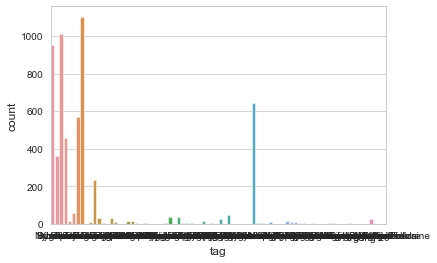

In [20]:
tv2_tags=tv2.groupby(["tag"])["titles"].transform("count").reset_index(name="tag")

plt.style.use('ggplot')
sns.set_style("whitegrid")

fig, ax = plt.subplots(nrows = 1, ncols = 1) # create placeholder for plot
ax = sns.countplot(x = 'tag', data = tv2)

In [21]:
tv2_tags

index     tag
0         0   945.0
1         1   362.0
2         2  1008.0
3         3   454.0
4         4  1008.0
...     ...     ...
7411   8752   559.0
7412   8753  1008.0
7413   8754   362.0
7414   8755    38.0
7415   8756     NaN

[7416 rows x 2 columns]